In [45]:
# price a bond
import numpy as np
def price(c_rate, Notional, IR, T):
    coups = []
    for i in range(1,T):
        coups.append(c_rate*Notional/((1+IR)**i))
    coups.append((Notional+c_rate*Notional)/((1+IR)**T))
    return np.sum(coups)


In [46]:
# price for different IRs
prices_5yr =[]
prices_30yr = []
yields = []
for j in range(0, 26):
    value = j * 0.04
    yields.append(value)
    prices_5yr.append(price(0.00, 100, value, 5))
    prices_30yr.append(price(0.00, 100, value, 30))



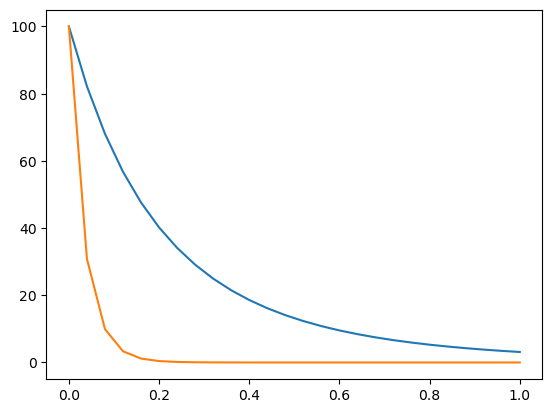

In [47]:
import matplotlib.pyplot as plt

plt.plot(yields, prices_5yr)
plt.plot(yields, prices_30yr)

In [48]:
prices_30yr

[100.0,
 30.83186679734204,
 9.937733254980117,
 3.337792387991653,
 1.1648240347074152,
 0.42127202330874297,
 0.1575249843473314,
 0.06077163357286267,
 0.02414249020207996,
 0.00985899732760511,
 0.004131986839916849,
 0.001774701176226419,
 0.0007800968749860292,
 0.00035050350211962155,
 0.00016079111594317897,
 7.523163845262627e-05,
 3.586613332646895e-05,
 1.74069045633686e-05,
 8.593035238765926e-06,
 4.311416362196546e-06,
 2.1969736438175394e-06,
 1.1362275352142456e-06,
 5.96025062692545e-07,
 3.1692984547769756e-07,
 1.7073315245245977e-07,
 9.313225746154785e-08]

In [24]:
yields

[0.0,
 0.04,
 0.08,
 0.12,
 0.16,
 0.2,
 0.24,
 0.28,
 0.32,
 0.36,
 0.4,
 0.44,
 0.48,
 0.52,
 0.56,
 0.6,
 0.64,
 0.68,
 0.72,
 0.76,
 0.8,
 0.84,
 0.88,
 0.92,
 0.96,
 1.0]

In [62]:
price(0.05, 100, 0.1001, 5) - price(0.05, 100, 0.1, 5)

-0.033057093136363846

In [59]:
def duration(price, c_rate, Notional, IR, T):
    coups = []
    dur = []
    for i in range(1,T):
        co = c_rate*Notional/((1+IR)**i)
        coups.append(co)
        dur.append(i*co)
    coups.append((Notional+c_rate*Notional)/((1+IR)**T))
    dur.append(T*(Notional+c_rate*Notional)/((1+IR)**T))
    return np.sum(dur)/price
        

In [60]:
duration(81.0461, 0.05, 100, 0.1, 5)

4.487860650694523

In [54]:
dur

NameError: name 'dur' is not defined

In [73]:
# duration vs maturity
durs = []
k=1
time=[]
for l in range(1,50):
    durs.append(duration(price(k/100,100, 0.10, l),k/100, 100, 0.10, l))
    time.append(l)
durs

[1.0,
 1.9892262487757102,
 2.965927790146162,
 3.928202138741029,
 4.873998516565179,
 5.801124925161729,
 6.707259620398813,
 7.5899675007839775,
 8.446721820793424,
 9.274931492671135,
 10.071974040858827,
 10.835234023884377,
 11.562146445373674,
 12.250244350897917,
 12.897209468819513,
 13.500924425088563,
 14.059524772407427,
 14.571448853752292,
 15.03548339825564,
 15.450802748405135,
 15.816999757229821,
 16.13410667651499,
 16.40260477199784,
 16.623421924494654,
 16.797918069883636,
 16.927858949672707,
 17.015379237464064,
 17.062936626882895,
 17.073258872972175,
 17.04928604334529,
 16.994110344134626,
 16.910915841118143,
 16.802920214544955,
 16.673320394215235,
 16.525243553125136,
 16.361704529560637,
 16.185570333227012,
 15.999532000191012,
 15.80608371649142,
 15.607508845857234,
 15.405872280112455,
 15.20301838200779,
 15.000573704727785,
 14.799953641974028,
 14.602372177143007,
 14.408853948877397,
 14.22024792273211,
 14.03724204550926,
 13.860378352120204]

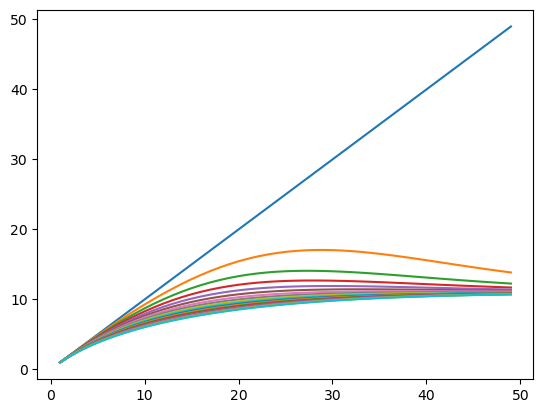

In [81]:
# Macaulay duration vs maturity
for k in range(0, 20):
    time=[]
    durs=[]
    for l in range(1,50):
        durs.append(duration(price(k/100,100, 0.10, l),k/100, 100, 0.10, l))
        time.append(l)
    plt.plot(time, durs)

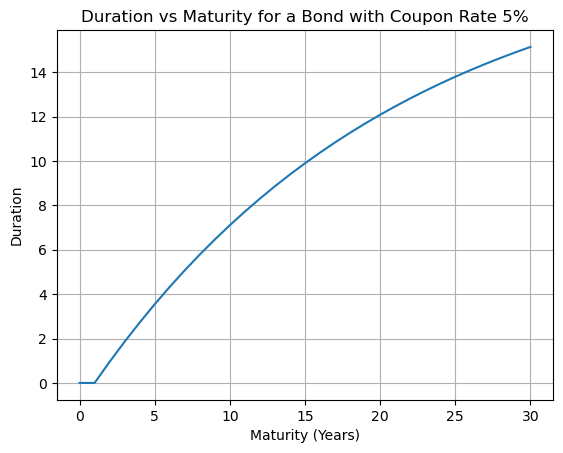

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Coupon rate and par value
coupon_rate = 0.05
par_value = 100

# Generate maturities from 0 to 30 years
maturities = np.arange(0, 31)

# Calculate durations for each maturity
durations = []
for maturity in maturities:
    cash_flows = [coupon_rate * par_value] * (maturity - 1) + [par_value + coupon_rate * par_value]
    pv_cash_flows = [cf / (1 + 0.05) ** t for t, cf in enumerate(cash_flows)]
    weighted_cf = [t * cf for t, cf in enumerate(pv_cash_flows)]
    duration = sum(weighted_cf) / sum(pv_cash_flows)
    durations.append(duration)

# Plotting the graph
plt.plot(maturities, durations)
plt.xlabel('Maturity (Years)')
plt.ylabel('Duration')
plt.title('Duration vs Maturity for a Bond with Coupon Rate 5%')
plt.grid(True)
plt.show()
